In [2]:
import math
import numpy as np
from code.thinkdsp import normalize, unbias, decorate, Signal, TriangleSignal, SquareSignal, SinSignal

Упражнение 2.2

Пилообразный сигнал линейно нарастает от -1 до 1, а затем резко падает до -1 и повторяется.
См. https://en.wikipedia.org/wiki/Sawtooth_wave

Напишите класс, называемый SawtoothSignal, расширяющий класс Signal
и предоставляющий метод evaluate для оценки пилообразного сигнала.

Вычислите спектр пилообразного сигнала.
Как соотносится его гармоническая структура с треугольным и прямоугольным сигналами?

Исходный код для класса SawtoothSignal и метода evaluate

In [3]:
class SawtoothSignal(Signal):

    def __init__(self, freq=440, amp=1.0, offset=0, func=np.sin):
        self.freq = freq
        self.amp = amp
        self.offset = offset
        self.func = func

    def period(self):
        return 1.0 / self.freq

    def evaluate(self, ts):
        ts = np.asarray(ts)
        cycles = self.freq * ts + self.offset / math.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Создание пилообразного сигнала и построение его графика

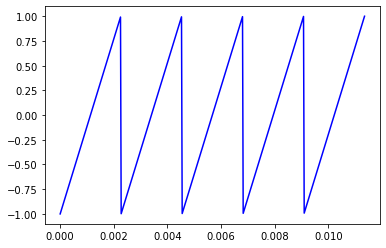

In [4]:
sawtooth_signal = SawtoothSignal()
sawtooth_wave = sawtooth_signal.make_wave(sawtooth_signal.period() * 5, framerate=40000)
sawtooth_wave.plot(color='blue')
sawtooth_wave.make_audio()

Создание пилообразного сигнала и построение графика для его спектра

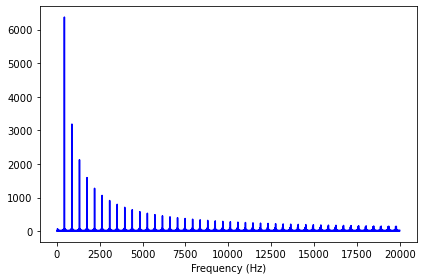

In [5]:
sawtooth_wave = sawtooth_signal.make_wave(0.5, framerate=40000)
sawtooth_spectrum = sawtooth_wave.make_spectrum()
sawtooth_spectrum.plot(color='blue')
decorate(xlabel='Frequency (Hz)')

Создание треугольного сигнала, построение графика для спектров пилообразного и треугольного сигналов

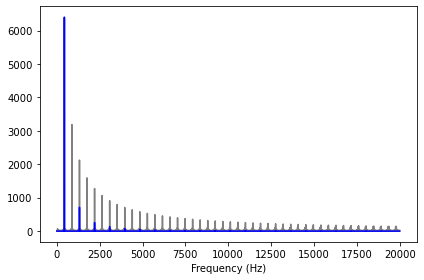

In [6]:
sawtooth_spectrum.plot(color='gray')
triangle_signal = TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle_signal.make_spectrum().plot(color='blue')
decorate(xlabel='Frequency (Hz)')

Создание прямоугольного сигнала, построение графика для спектров пилообразного и прямоугольного сигналов

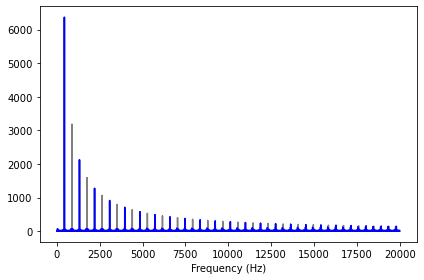

In [7]:
sawtooth_spectrum.plot(color='gray')
square_signal = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square_signal.make_spectrum().plot(color='blue')
decorate(xlabel='Frequency (Hz)')

Упражнение 2.3
Создайте прямоугольный сигнал 1100 Гц и вычислите wave с выборками 10 000 кадров в секунду.
Постройте спектр и убедитесь, что большинство гармоник "завернуты" из-за биений.
Слышны ли последствия этого при проигрывании?

Создание прямоугольного сигнала 1100 Гц и построение графика для его спектра

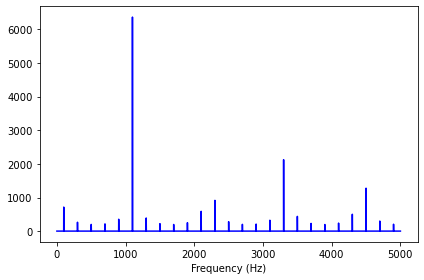

In [8]:
square_signal = SquareSignal(freq=1100).make_wave(framerate=10000)
square_signal.make_spectrum().plot(color='blue')
decorate(xlabel='Frequency (Hz)')

Создание записи прямоугольного сигнала для прослушивания и синусоидального сигнала 200 Гц для проверки утверждения,
что основной тон, который мы воспринимаем, является гармоникой биения на частоте 200 Гц

In [9]:
square_signal.make_audio()

In [20]:
SinSignal(200).make_wave(duration=0.5, framerate=10000).make_audio()

Упражнение 2.4
Возьмите объект Spectrum и распечатайте несколько первых значений spectrum.fs.
Убедитесь, что они начинаются с нуля, то есть Spectrum.hs[0] - амплитуда компоненты с частотой 0.
Но что это значит? Проведите такой эксперимент:
    1. Создайте треугольный сигнал с частотой 440 Гц и wave длительностью 0.01 секунды. Распечатайте сигнал.
    2. Создайте объект Spectrum и распечатайте Spectrum.hs[0]. Каковы амплитуда и фаза этого компонента?
    3. Установите Spectrum.hs[0] = 100. Как эта операция повлияет на сигнал?
       Подсказка: Spectrum дает метод, называемый make_wave, вычисляющий wave, соответствующий Spectrum.

Построение пиловидного сигнала длительностью 0.01 и графика для него

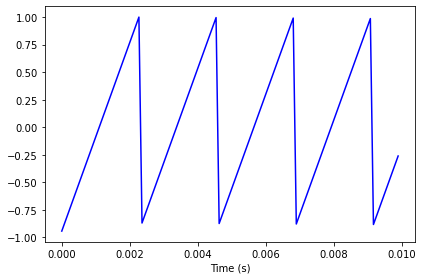

In [10]:
sawtooth_signal = SawtoothSignal().make_wave(duration=0.01)
sawtooth_signal.plot(color='blue')
decorate(xlabel='Time (s)')

Построение спектра сигнала и вывод 0 значения из hs

In [11]:
spectrum = sawtooth_signal.make_spectrum()
print(spectrum.hs[0])

(-1.454392162258955e-14+0j)


Изменение нулевой компоненты и построение графиков для сравнения сигнала до изменения и после

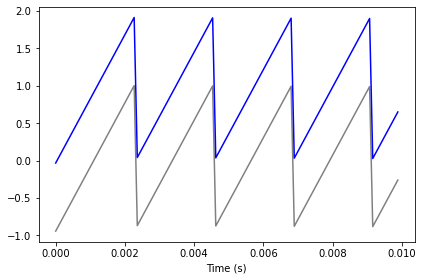

In [12]:
spectrum.hs[0] = 100
sawtooth_signal.plot(color='gray')
spectrum.make_wave().plot(color='blue')
decorate(xlabel='Time (s)')

Упражнение 2.5
Напишите функцию, принимающую Spectrum как параметр
и изменяющую его делением каждого элемента hs на соответствующую частоту из fs.
Подсказка: поскольку деление на 0 не определено, надо задать Spectrum.hs[0] = 0.
Проверьте эту функцию, используя прямоугольный, треугольный или пилообразный сигналы:
    1. Вычислите Spectrum и распечатайте его.
    2. Измените Spectrum, вновь используя свою функцию, и распечатайте его.
    3. Используйте Spectrum.make_wave, чтобы сделать wave из измененного Spectrum, и прослушайте его.
       Какая операция повлияла на сигнал?

Код для функции, изменяющей спектр у сигнала

In [13]:
def spectrum_changer(spectrum):
    i = 0
    while i < len(spectrum):
        if i == 0:
            spectrum.hs[i] = 0
        else:
            spectrum.hs[i] = spectrum.hs[i] / spectrum.fs[i]
        i += 1

Создание нового пиловидного сигнала длительностью 1 секунда

In [14]:
wave = SawtoothSignal().make_wave(duration=1)

Создание спектра для сигнала, изменение спектра и отрисовка графиков до и после вызова функции для проверки

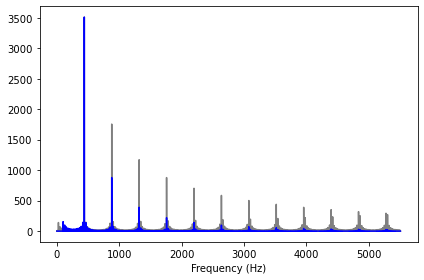

In [15]:
spectrum = wave.make_spectrum()
spectrum.plot(color='gray')
spectrum_changer(spectrum)
spectrum.high_pass(100)
spectrum.scale(440)
spectrum.plot(color='blue')
decorate(xlabel='Frequency (Hz)')

Создание записей сигнала до и после изменений для сравнения

In [16]:
wave.make_audio()

In [21]:
changed_signal = spectrum.make_wave()
changed_signal.make_audio()

Упражнение 2.6
У треугольных и прямоугольных сигналов есть только нечетные гармоники;
в пилообразном сигнале есть и четные и нечетные гармоники.
Гармоники прямоугольных и пилообразных сигналов уменьшаются пропорционально 1/f;
гармоники треугольных сигналов - пропорционально 1/f^2.
Можно ли найти сигнал, состоящий из четных и нечетных гармоник, спадающих пропорционально 1/f^2?
Подсказка: для этого есть два способа. Можно собрать желаемый сигнал из синусоид,
а можно взять сигнал со спектром, похожим на необходимый, и изменять его параметры.

Создание пилообразного сигнала для изменения его гармоник на пропорциональные 1/f^2

In [17]:
sawtooth_signal = SawtoothSignal().make_wave(duration=0.5, framerate=20000)

Изменение гармоник с помощью метода, написанного в предыдущем упражнении,построение графика для сравнения спектров

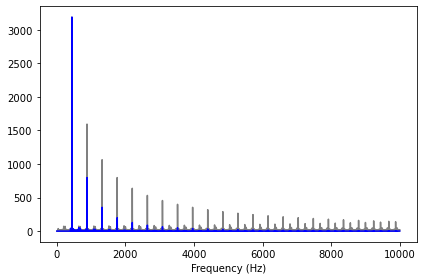

In [29]:
spectrum = sawtooth_signal.make_spectrum()
spectrum.plot(color='gray')
spectrum_changer(spectrum)
spectrum.scale(440)
spectrum.high_pass(400)
spectrum.plot(color='blue')
decorate(xlabel='Frequency (Hz)')

Построение графика сигнала по спектру измененного сигнала

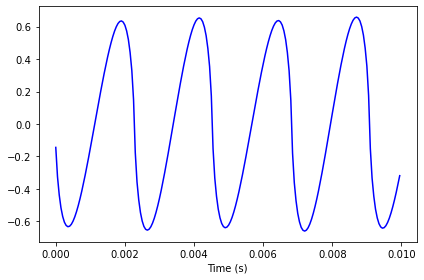

In [30]:
spectrum.make_wave().segment(duration=0.01).plot(color='blue')
decorate(xlabel='Time (s)')